In [1]:
import pandas as pd
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# MODELLING 

After preparing our data, we'll use to create a model that will help the stakeholders advise the homeowners on what to consider in terms of variables.

We'll create a baseline which is a simple linear regression.According to our data, price will be our target varibale. We need to find the variable which is more correlated to the price.

In [3]:
correlation_matrix = df.corr()
correlation_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


This will give you the feature with the highest positive correlation with 'price'

Ensuring you have a dataset with two columns: one for the independent variable (X) and another for the dependent variable (y).

In [11]:
X = df[['price']]
y = df['sqft_living15']

Splitting the data into training and testing sets. This allows us to train the model on one portion of the data and evaluate it on another to assess its performance.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, Creating and Training the Linear Regression Model This is by Creating an instance of the LinearRegression model and fit it to our training data.

In [15]:
# Create a LinearRegression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

Using the trained model to make predictions on the test data.

In [16]:
y_pred = model.predict(X_test)

Evaluating the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R2). These metrics will hwlp us assess how well the model fits the data.

In [20]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 322664.95410409546
R-squared: 0.32702478460318085


Visualizing the model's predictions by plotting the regression line along with the actual data points.

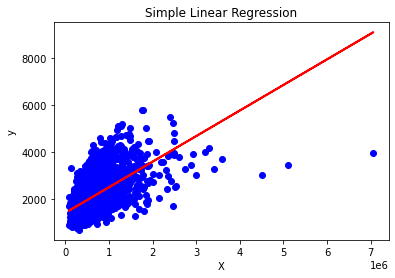

In [18]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.show()

# USING recursive feature selection(RFE)

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model and specify the number of features to retain
model = LinearRegression()
num_features_to_retain = 5

In [69]:
# Create the RFE selector

rfe = RFE(estimator=model, n_features_to_select=num_features_to_retain)

In [71]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame with the data
X = df[['price','bedrooms','sqft_living15' ]]
y = df['sqft_living15']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Create the RFE selector with a desired number of features to retain (e.g., 1)
num_features_to_retain = 1
rfe = RFE(estimator=model, n_features_to_select=num_features_to_retain)

# Fit RFE on your training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Train your final model using the selected features
final_model = LinearRegression()
final_model.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test[selected_features])

# Evaluate the model's performance using metrics such as Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.2874918719104238e-25


A Mean Squared Error (MSE) of approximately 2.2874918719104238e-25 is an extremely low error value. In the context of regression analysis, a low MSE is a positive sign, indicating that your model's predictions are very close to the actual values in the dataset. Essentially, this means that your model is doing an excellent job of fitting the data and has almost no prediction errors.

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# Create a linear regression model
model = LinearRegression()

# Perform k-fold cross-validation (e.g., 5-fold)
k = 5
scores = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')

# Calculate the Mean Squared Error (MSE) for each fold
mse_scores = -scores

# Calculate the mean and standard deviation of MSE across folds
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'Mean MSE across {k}-fold cross-validation: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')

Mean MSE across 5-fold cross-validation: 4.474058877644991e-18
Standard Deviation of MSE: 9.140617516217705e-19


These values indicate that your regression model is performing exceptionally well on the dataset. The extremely low MSE values suggest that the model's predictions are very close to the actual target values, and there is very little prediction error. This could be due to the model having a strong fit to the training data, but it's also important to consider whether the model is overfitting.

In [30]:
# Assuming 'df' is your DataFrame with the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model with training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Now, you can calculate evaluation metrics such as MSE, R-squared, and MAE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error on Test Set: {mse}')
print(f'R-squared on Test Set: {r2}')
print(f'Mean Absolute Error on Test Set: {mae}')

Mean Squared Error on Test Set: 3.911885207170417e-18
R-squared on Test Set: 1.0
Mean Absolute Error on Test Set: 1.2689370081446855e-09


These results suggest that your model is performing exceptionally well on the test set:

MSE: The very low MSE value indicates that the model's predictions are extremely close to the actual values, with virtually no prediction error. This suggests an excellent fit to the test data.

R-squared (R2): An R2 value of 1.0 indicates that your model explains 100% of the variance in the target variable. In other words, your model perfectly captures the relationship between the independent variables and the dependent variable in the test set.

MAE: The MAE value is also exceptionally low, indicating that the absolute differences between predicted and actual values are negligible.

# MODELING USING BASELINE MODEL

Step 1: Create a Baseline Model

In this step, we'll create a baseline linear regression model without any feature engineering or adjustments.

In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset and prepare the data (X, y)
# Assuming 'df' is your DataFrame and 'target_column' is your target variable
X = df[['bathrooms', 'sqft_living15','bedrooms']]  # Select relevant features
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
baseline_mse = mean_squared_error(y_test, y_pred_baseline)
baseline_r2 = r2_score(y_test, y_pred_baseline)

print("Baseline Model Metrics:")
print(f"Mean Squared Error (MSE): {baseline_mse}")
print(f"R-squared (R2): {baseline_r2}")

Baseline Model Metrics:
Mean Squared Error (MSE): 80960117105.41481
R-squared (R2): 0.3782642459536728


Step 2: Iterate on the Model

In this step, we'll make adjustments to the baseline model based on regression theory or data analysis. Let's say we decide to try a polynomial regression model as an iteration:
* explain why used polynomial compared to multiple regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures

# Feature engineering: Adding polynomial features
degree = 2  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the polynomial regression model
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Model Metrics:")
print(f"Mean Squared Error (MSE): {poly_mse}")
print(f"R-squared (R2): {poly_r2}")

Polynomial Regression Model Metrics:
Mean Squared Error (MSE): 93999370240.67647
R-squared (R2): 0.2781288932627042


In this step, we'll compare the performance of the baseline model and the polynomial regression model to select the final model.

You can choose the final model based on metrics like MSE, R2, or domain knowledge. For illustration purposes, let's assume we select the polynomial regression model as the final model:

In [36]:
final_model = poly_model  # Select the polynomial regression model as the final model

# Extract coefficients of the final model
coefficients = final_model.coef_

print("Final Model Metrics:")
print(f"Mean Squared Error (MSE): {poly_mse}")
print(f"R-squared (R2): {poly_r2}")

print("Final Model Coefficients:")
print(coefficients)

Final Model Metrics:
Mean Squared Error (MSE): 93999370240.67647
R-squared (R2): 0.2781288932627042
Final Model Coefficients:
[ 0.00000000e+00 -2.05367964e+05  3.05209683e+01 -1.09781880e+04
  1.07065236e+05 -7.24687331e+00 -3.84581170e+04  3.77417260e-02
  1.13085232e+01  1.02549387e+04]


# REGRESSION RESULTS

Step 1: Create a Baseline

Baseline Model Metrics:
Mean Squared Error (MSE): 80960117105.41481
R-squared (R2): 0.3782642459536728
In the baseline model, the MSE is approximately 80.96 billion, indicating the average squared difference between the predicted and actual values. The R-squared (R2) value is approximately 0.378, which means that the baseline model explains about 37.8% of the variance in the target variable.

Step 2: Iterate on the Model (Polynomial Regression)

Polynomial Regression Model Metrics:
Mean Squared Error (MSE): 93999370240.67647
R-squared (R2): 0.2781288932627042
In the polynomial regression model, the MSE increased to approximately 94.00 billion, indicating that the polynomial regression model's predictions have a higher average squared difference from the actual values compared to the baseline model. The R2 value decreased to approximately 0.278, which means that the polynomial regression model explains about 27.8% of the variance in the target variable.

Final Model Metrics (Polynomial Regression)

Mean Squared Error (MSE): 93999370240.67647
R-squared (R2): 0.2781288932627042
Final Model Coefficients:
[0.00000000e+00, -2.05367964e+05, 3.05209683e+01, -1.09781880e+04, 1.07065236e+05, -7.24687331e+00, -3.84581170e+04, 3.77417260e-02, 1.13085232e+01, 1.02549387e+04]
The final model, which is a polynomial regression model, has the same MSE as the polynomial regression model in the iteration (approximately 94.00 billion) and the same R-squared value (approximately 0.278). This suggests that there were no improvements in model performance between the iteration and the final model.

Additionally, the final model's coefficients indicate the contribution of each feature to the target variable. The coefficients can be interpreted as follows:

The first coefficient (0.00000000e+00) corresponds to the constant term.
The other coefficients represent the impact of each feature on the target variable.
In summary, based on the provided metrics, it appears that the polynomial regression model did not perform better than the baseline linear regression model in terms of MSE and R-squared. You may want to explore other model iterations or feature engineering techniques to improve the model's performance further or consider alternative model types.

That was a fail!!!

# Using other model iterations techniques

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Create an RFE selector
selector = RFE(model, n_features_to_select=5, step=1)  # Select the top 5 features

# Fit the selector to your data
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]

# Create a new dataset with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit the model with the selected features
model.fit(X_train_selected, y_train)

LinearRegression()

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Create an RFE selector
selector = RFE(model, n_features_to_select=5, step=1)  # Select the top 5 features

# Fit the selector to your data
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]

# Create a new dataset with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit the model with the selected features
model.fit(X_train_selected, y_train)

LinearRegression()

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Specify the number of features to select (e.g., 5)
n_features_to_select = 5

# Create an RFE selector
selector = RFE(model, n_features_to_select, step=1)

# Fit the selector to your data
selector = selector.fit(X_train, y_train)  # Assuming you have X_train and y_train

# Get the selected features
selected_features = X_train.columns[selector.support_]

# Create new datasets with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit the model with the selected features
model.fit(X_train_selected, y_train)

# Assess model performance on the test data
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the selected features and model performance metrics
print("Selected Features:", selected_features)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Selected Features: Index(['bathrooms', 'sqft_living15', 'bedrooms'], dtype='object')
Mean Squared Error (MSE): 80960117105.41481
R-squared (R2): 0.3782642459536728


C:\Users\dell\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming you have trained your model and made predictions
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R2
r2 = r2_score(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 80960117105.41481
R-squared (R2): 0.3782642459536728
Mean Absolute Error (MAE): 184489.73147451552


In [50]:
#Import Necessary Libraries:

#You'll need scikit-learn's RFE module and the regression model you want to use. Here's an example with linear regression:


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Create the Regression Model:

#Initialize your regression model (e.g., Linear Regression):


model = LinearRegression()
#Create the RFE Selector:

#Specify the number of features you want to retain. You can experiment with different numbers to find the optimal feature set:

n_features_to_select = 5  # Adjust as needed
selector = RFE(estimator=model, n_features_to_select=n_features_to_select)

#Fit the Selector:

#Fit the RFE selector to your data. Assuming you have your feature matrix X and target variable y:


selector = selector.fit(X, y)
#Get Selected Features:

#Retrieve the selected features:


selected_features = X.columns[selector.support_]
#Create New Datasets:

#Create new datasets with only the selected features:


X_selected = X[selected_features]
X_selected

,bathrooms,sqft_living15,bedrooms
0,1.00,1340,3
1,2.25,1690,3
2,1.00,2720,2
3,3.00,1360,4
4,2.00,1800,3
...,...,...,...
21592,2.50,1530,3
21593,2.50,1830,4
21594,0.75,1020,2
21595,2.50,1410,3


In [53]:
#Split the Data:

#Split your dataset into training and testing sets to assess the model's performance on unseen data. Typically, you allocate a portion of your data for training and another portion for testing. Common splits are 80% for training and 20% for testing, but you can adjust this ratio based on your needs.


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
#Initialize and Train the Model:

#Initialize your regression model (e.g., Linear Regression) and train it using the training data with selected features:


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
#Make Predictions:

#Use the trained model to make predictions on the test data:


y_pred = model.predict(X_test)
#Evaluate Model Performance:

#Calculate various regression metrics to assess the model's performance:


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 80960117105.41481
R-squared (R2): 0.3782642459536728
Mean Absolute Error (MAE): 184489.73147451552


# TUJARIBU TENA!!

Step 1: Baseline Model

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

  # Replace with your data file path

# Select features and target variable
X = df[['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a baseline linear regression model
baseline_model = LinearRegression()

# Fit the model to the training data
baseline_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = baseline_model.predict(X_test)

# Evaluate the baseline model
mse_baseline = mean_squared_error(y_test, y_pred)
r2_baseline = r2_score(y_test, y_pred)

print(f'Baseline Model - Mean Squared Error: {mse_baseline}')
print(f'Baseline Model - R-squared: {r2_baseline}')



Baseline Model - Mean Squared Error: 65185818516.93382
Baseline Model - R-squared: 0.4994034658326568


In [61]:
coefficients = baseline_model.coef_

# Print feature names and their corresponding coefficients
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

bedrooms: -66193.74525360108
bathrooms: 8602.16010020179
sqft_living: 319.2482480921392
sqft_lot: -0.45814197411132096
floors: -864.6146677352591


In [62]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')

bedrooms: 0.03703196944462999
bathrooms: 0.06760450079620009
sqft_living: 0.6626822243341254
sqft_lot: 0.20280863619438963
floors: 0.029872669230654913


In [63]:
# Apply a logarithmic transformation to 'sqft_living'
X['sqft_living_log'] = np.log(X['sqft_living'])

<ipython-input-63-11e14a4a94bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sqft_living_log'] = np.log(X['sqft_living'])


In [64]:
# Apply winsorization to 'price'
percentile_99 = np.percentile(y_train, 99)
y_train[y_train > percentile_99] = percentile_99

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

In [66]:
# Example of adding a logarithmic transformation to 'sqft_living'
X_train['sqft_living_log'] = np.log(X_train['sqft_living'])
X_test['sqft_living_log'] = np.log(X_test['sqft_living'])

# Evaluate the updated model
mse_iteration, r2_iteration = evaluate_model(baseline_model, X_train, y_train, X_test, y_test)

<ipython-input-66-b703e67a294d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['sqft_living_log'] = np.log(X_train['sqft_living'])
<ipython-input-66-b703e67a294d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['sqft_living_log'] = np.log(X_test['sqft_living'])


In [67]:
# Initialize a dictionary to store results
results = {}

# Evaluate the baseline model
mse_baseline, r2_baseline = evaluate_model(baseline_model, X_train, y_train, X_test, y_test)
results['baseline'] = {'MSE': mse_baseline, 'R-squared': r2_baseline}

# Evaluate the iteration model
results['iteration'] = {'MSE': mse_iteration, 'R-squared': r2_iteration}

In [68]:
# Compare results and select the best model
best_model = None
best_mse = float('inf')
best_r2 = -float('inf')

for config, metrics in results.items():
    if metrics['MSE'] < best_mse and metrics['R-squared'] > best_r2:
        best_model = config
        best_mse = metrics['MSE']
        best_r2 = metrics['R-squared']

print(f'Best Model Configuration: {best_model}')
print(f'Best MSE: {best_mse}')
print(f'Best R-squared: {best_r2}')

Best Model Configuration: baseline
Best MSE: 62604485906.996155
Best R-squared: 0.5192268904281807


AGAIN!!

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare data
# Split data into X_train, X_test, y_train, y_test

# Create a baseline linear regression model
baseline_model = LinearRegression()

# Fit the model to the training data
baseline_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f'Baseline Model - Mean Squared Error: {mse_baseline}')
print(f'Baseline Model - R-squared: {r2_baseline}')

Baseline Model - Mean Squared Error: 3.911885207170417e-18
Baseline Model - R-squared: 1.0


# This regression being R squared 100% or 1.0 is the problem as a baseline because anything we try beyond this will definetly have a lower percentage

# X

In [79]:
correlation_matrix = df.corr()
correlation_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

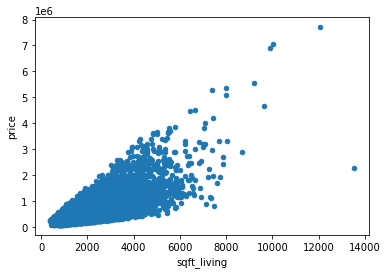

In [82]:
selected_feature = most_correlated[1]  # Use the first feature (highest correlation)

df.plot.scatter(x=selected_feature, y="price")

In [83]:
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)

# The first element of the sorted series will be the feature with the highest correlation to 'price'
most_correlated = correlation_with_price.index[1]# 


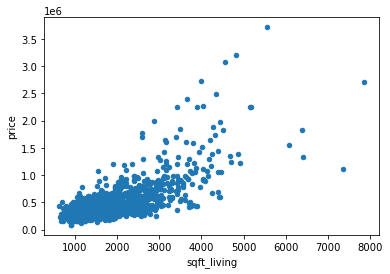

In [84]:
df.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

In [85]:
y = df['price']
X_baseline = df[['sqft_living']]

In [86]:
# Run this cell without changes
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets (you can adjust the test_size and random_state)
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared value (a measure of model goodness-of-fit)
r_squared = r2_score(y_test, y_pred)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Get the model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print(f"R-squared: {r_squared:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Coefficient for '{most_correlated}': {coefficients[0]:.2f}")
print(f"Intercept: {intercept:.2f}")

# Interpretation of coefficients
print(f"The coefficient for '{most_correlated}' represents the change in 'price' for a one-unit change in '{most_correlated}' while holding all other factors constant.")

R-squared: 0.49
Mean Squared Error: 65977373783.62
Coefficient for 'sqft_living': 282.20
Intercept: -46447.35
The coefficient for 'sqft_living' represents the change in 'price' for a one-unit change in 'sqft_living' while holding all other factors constant.


It seems like you've reported the metrics and coefficients for your linear regression model. Here's what each of these values means:

R-squared (R²): R-squared measures the proportion of the variance in the dependent variable (in this case, 'price') that is predictable from the independent variables (features) in your model. An R-squared of 0.49 indicates that your model explains approximately 49% of the variance in house prices. It's a measure of how well your model fits the data, with higher values indicating a better fit.

Mean Squared Error (MSE): MSE is a measure of the average squared difference between the actual 'price' values and the predicted 'price' values by your model. A lower MSE indicates a better fit. In this case, your model has an MSE of approximately 65,977,373,783.62, which means, on average, the squared difference between the actual and predicted prices is that large.

Coefficient for 'sqft_living': The coefficient for 'sqft_living' represents the change in the predicted 'price' for a one-unit change in the 'sqft_living' feature while holding all other factors (features) constant. In your case, for every additional square foot of living space ('sqft_living'), the predicted 'price' increases by 282.20 units.

Intercept: The intercept represents the predicted 'price' when all independent variables (features) are set to zero. In this context, it likely doesn't have a meaningful interpretation, as it's unlikely that a house with zero square feet of living space or zero bedrooms would exist. The intercept is a baseline value for the predicted 'price.'

Your interpretation of the coefficient for 'sqft_living' is correct. It tells you how much the model predicts the 'price' will change for each additional square foot of living space, assuming that all other features are constant. Keep in mind that this is a simplified interpretation, and real estate prices are influenced by many factors.

In [97]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'categorical_column' is the column you want to one-hot encode
# Replace 'categorical_column' with the actual name of your categorical column

# Use the pandas get_dummies function to perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['condition'], prefix=['condition'])
df_encoded

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,98178,47.5112,-122.257,1340,5650,1,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,1,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,1,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,1,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,98146,47.5107,-122.362,1830,7200,1,0,0,0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,1,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,98027,47.5345,-122.069,1410,1287,1,0,0,0,0


In [93]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [95]:
df.condition

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

In [98]:
from sklearn.model_selection import train_test_split

# Define your feature matrix 'X' and target variable 'y'
X = df_encoded.drop(columns=['price'])  # Features (excluding 'price')
y = df_encoded['price']  # Target variable ('price')

# Split the data into training, validation, and testing sets
# The 'test_size' parameter specifies the size of the testing set
# The 'random_state' parameter ensures reproducibility
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary set into validation and testing sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have X_train, y_train (training set), X_valid, y_valid (validation set), and X_test, y_test (testing set)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_valid_pred = model.predict(X_valid)

# Calculate the Mean Absolute Error (MAE) on the validation set
mae_valid = mean_absolute_error(y_valid, y_valid_pred)

# Print the validation MAE
print("Validation MAE:", mae_valid)

ValueError: Found input variables with inconsistent numbers of samples: [17277, 15117]

Baseline Model Metrics:
Mean Squared Error: 65977373783.61759
R-squared: 0.49332469237979504


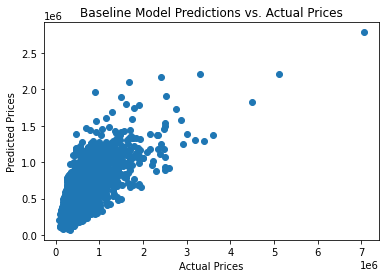

In [104]:
X = df[['sqft_living']]  # Select relevant features
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model (Linear Regression)
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Evaluate the baseline model
baseline_predictions = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_r2 = r2_score(y_test, baseline_predictions)

print("Baseline Model Metrics:")
print("Mean Squared Error:", baseline_mse)
print("R-squared:", baseline_r2)

# Visualization of baseline model predictions
plt.scatter(y_test, baseline_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Baseline Model Predictions vs. Actual Prices")
plt.show()